# An example of neutrino propagation simulation through flexOPT.jl 
Some of functions are the fruit of works from Estelle Salomé (July-August 2025) and TIPE (2025-2026).

i need to make a lazy option

In [1]:

using Pkg

cd(@__DIR__)
Pkg.activate("../")
ParamFile = "../config/testparam.csv" # 1D Earth/Mars/Moon models are defined

include("../src/commonBatchs.jl")
include("../src/planet1D.jl")
include("../src/GeoPoints.jl")

include("../src/Neurthino.jl")

using .commonBatchs, .planet1D, .GeoPoints
using Colors



  Activating project at `~/Documents/Github/flexOPT`


geodynamical model directory (Takashi \& Paul, we cannot share the models online!)
Paul is ready to give us more models whenever we want but the data are confidential and I cannot share on the Github

In [2]:
dir="/Users/nobuaki/Documents/MantleConvectionTakashi/op_old_full_mars_2025/"
rhoFiles=myListDir(dir; pattern=r"test_rho\d");
compositionFiles=myListDir(dir; pattern=r"test_c\d");
temperatureFiles=myListDir(dir; pattern=r"test_t\d");
wtrFiles=myListDir(dir; pattern=r"test_wtr\d");

## making 2D(/3D) box with the aid of GeoPoint.jl, reading 1D Earth model (cf. ParamFile) using planet1D.jl

Please refer to getRegionalBox.ipynb if you have some questions 

In [3]:
set_default_planet!(:SphericalEarth) # the default is ":Earth"
#SphericalEarth means a perfect sphere with a radius of 6371000.0 m 
# otherwise of course, I made an Earth with ellipticity 

#planet1D.my1DDSMmodel=getSet1Dmodel!(:ak135) # if you want to try other 1D models, you can call getSet1Dmodel!(:name; modelPath="model_0000.nd")

#planet1D.my1DDSMmodel=getSet1Dmodel!(:PREM) 

Ellipsoid(SphericalEarth)

In [4]:
# you can do some more exercises with getRegionalBox.ipynb but just trust me here

# two (extreme) points that can define the slice (or the x-y local plane for 3D box)
p1 = GeoPoint(0.0,0.0;alt=30.e3) # lat, lon in degrees, altitude in metre (as an option)
# if you call GeoPoints with three floats without ; for alt, it will interpret as x, y, z in cartesian ecef coordinates
p2 = GeoPoint(0.0,180.0;alt=30.e3) # 


Δx = 25.e3 # in metre
Δz = 25.e3

altMax = 6500.e3
altMin = -6500.e3

-6.5e6

In [5]:
boxGrids=constructLocalBox(p1,p2,Δx,Δz,altMin,altMax;centreOption ="centreOfPlanet")

(allGridsInGeoPoints = GeoPoint[GeoPoint(-45.43966908250703, 0.0, 2.7516531776671205e6, [6.401e6, 0.0, -6.5e6], 9.12265317766712e6) GeoPoint(-45.32928246384667, 0.0, 2.733857275103219e6, [6.401e6, 0.0, -6.475e6], 9.104857275103219e6) … GeoPoint(45.32928246384667, 0.0, 2.733857275103219e6, [6.401e6, 0.0, 6.475e6], 9.104857275103219e6) GeoPoint(45.43966908250703, 0.0, 2.7516531776671205e6, [6.401e6, 0.0, 6.5e6], 9.12265317766712e6); GeoPoint(-45.551759633065544, 0.0, 2.7341291039721128e6, [6.376e6, 0.0, -6.5e6], 9.105129103972113e6) GeoPoint(-45.44137965647728, 0.0, 2.7162988836067226e6, [6.376e6, 0.0, -6.475e6], 9.087298883606723e6) … GeoPoint(45.44137965647728, 0.0, 2.7162988836067226e6, [6.376e6, 0.0, 6.475e6], 9.087298883606723e6) GeoPoint(45.551759633065544, 0.0, 2.7341291039721128e6, [6.376e6, 0.0, 6.5e6], 9.105129103972113e6); … ; GeoPoint(-45.560745512186976, 180.0, 2.7327286866426338e6, [-6.374e6, 0.0, -6.5e6], 9.103728686642634e6) GeoPoint(-45.45036614124069, 180.0, 2.714895718

In [6]:
# getting model parameters on the 2D disk
seismicModel=lazyProduceOrLoad("seismicModel2DGlobal",getParamsWithoutTopo,boxGrids.allGridsInGeoPoints,boxGrids.effectiveRadii)

Computing seismicModel2DGlobal


(ρ = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Vpv = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Vph = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Vsv = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Vsh = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Qμ = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Qκ = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], QμPower = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], QκPower = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], η = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

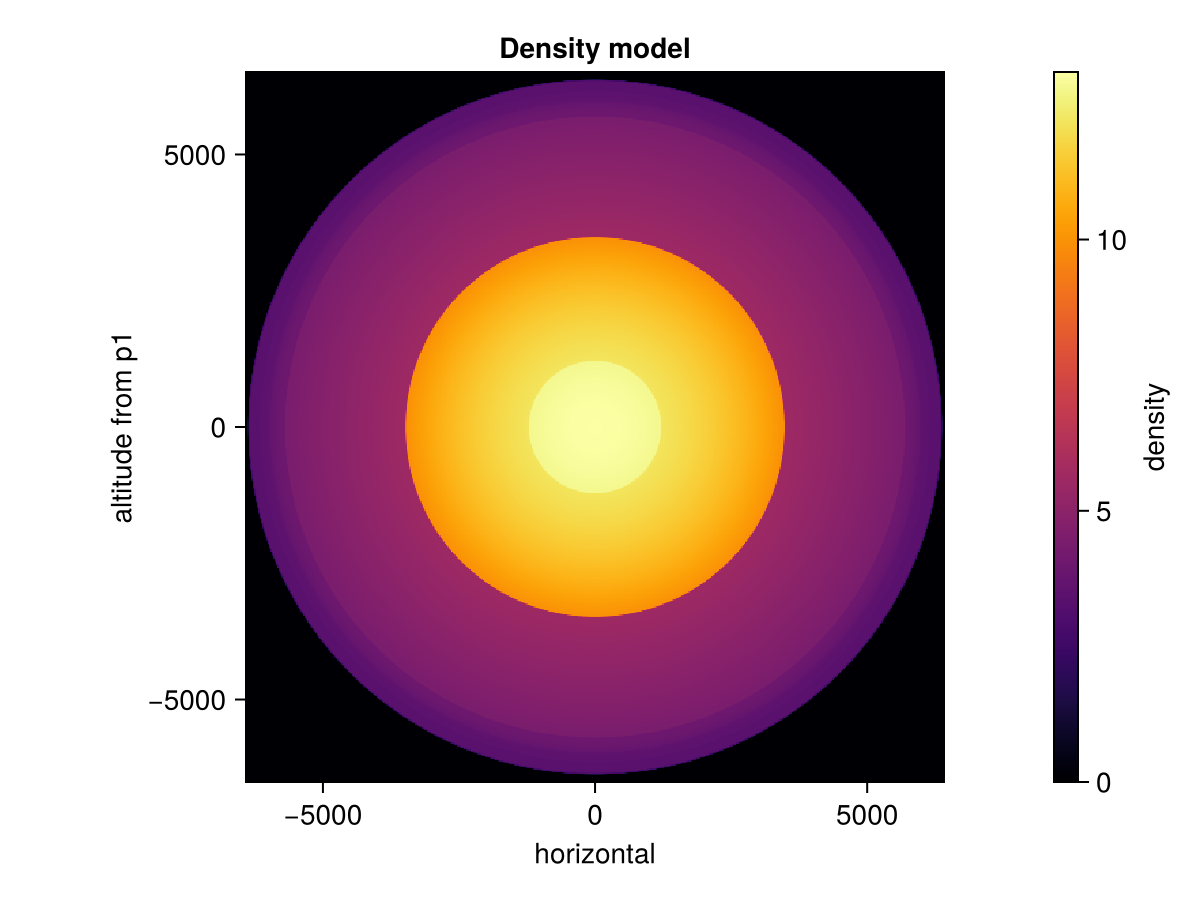

In [7]:
using CairoMakie
xvals = [p.xz[1] for p in boxGrids.allGridsInCartesian[:,1]]*1.e-3
zvals = [p.xz[2] for p in boxGrids.allGridsInCartesian[1,:]]*1.e-3
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    #collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.ρ;
    xvals, zvals, seismicModel.ρ ;
    colormap = :inferno,
    #colorrange=(0,4),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "altitude from p1", title = "Density model")
)
Colorbar(fig[1,2], hm, label="density")
fig

# Superposition or Replacement by tomographic/geodynamic 2D/3D models

Tell me if you have your own format of the model, I will try to make buffer functions

# Reading models from Takashi and Paul